# ケリー基準

ケリー基準は、「長期的に資金を最大化するための最適ベット率」を求める理論です。  
勝率とオッズを入力することで、どれだけの割合を賭けるべきかを算出します。  

## ケリー基準の公式

$$
f^* = \frac{bp - q}{b}
$$

- $ f^* $：賭け金の割合（全資金に対する比率）  
- $ b $：オッズ（配当倍率 − 1）  
- $ p $：勝つ確率  
- $ q = 1 - p $：負ける確率  

## 計算例

たとえば、勝率が 55%（$ p = 0.55 $）、オッズが 1.5倍（$ b = 1.5 $）の場合：

$$
f^* = \frac{1.5 \times 0.55 - 0.45}{1.5} = 0.25
$$

→ **全資金の 25% を賭けるのが最適** となります。


In [ ]:
# 必要ライブラリのインポート
import sys
sys.path.append("../src") # srcをパスに追加

In [ ]:
import kelly

print(kelly.kelly_fraction(0.55, 2.5))

0.25000000000000006


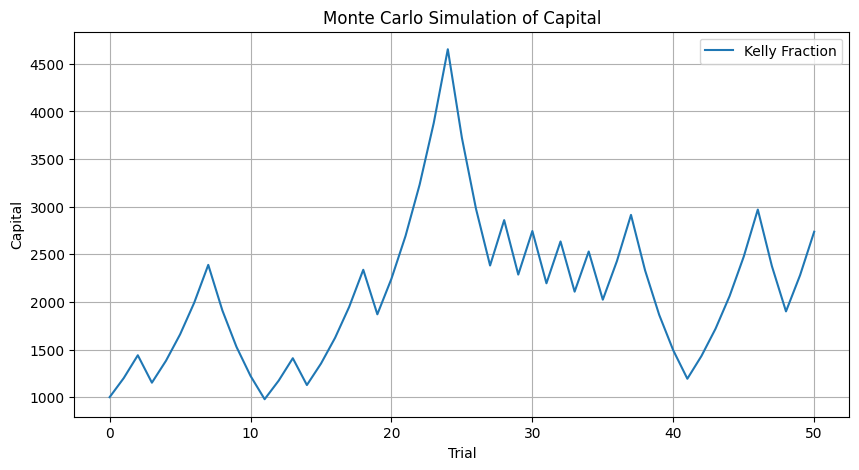

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import kelly

# パラメータ
start_capital = 1000
win_prob = 0.6
win_odds = 2.0
n_trials = 50

# シミュレーション
history = kelly.simulate_kelly(start_capital, win_prob, win_odds, n_trials)

# 結果可視化
plt.figure(figsize=(10,5))
plt.plot(history, label="Kelly Fraction")
plt.title("Monte Carlo Simulation of Capital")
plt.xlabel("Trial")
plt.ylabel("Capital")
plt.grid(True)
plt.legend()
plt.show()

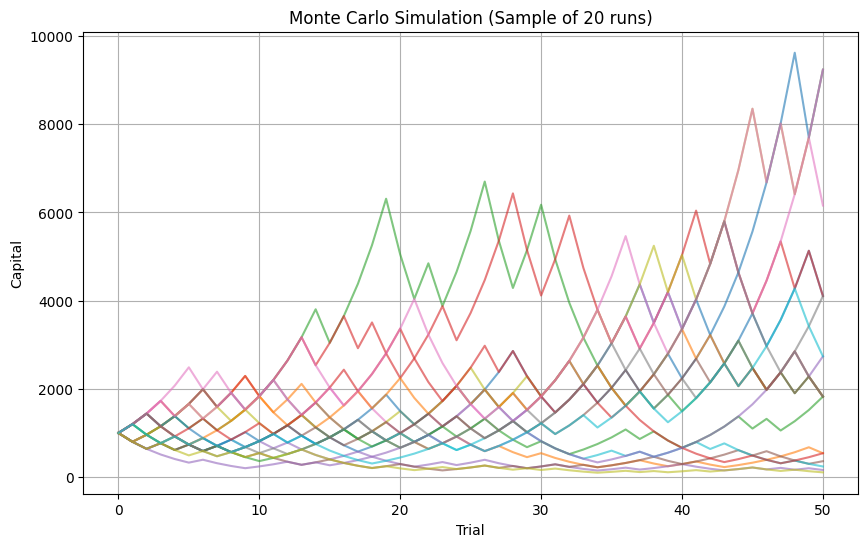

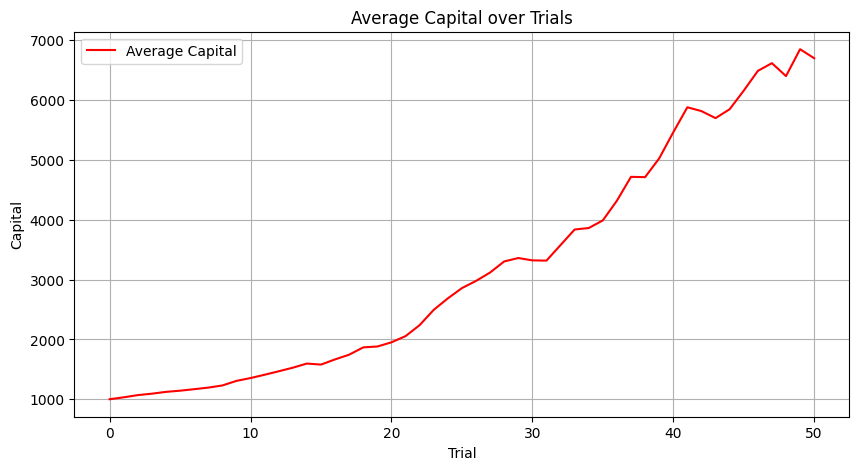

In [38]:
n_simulations = 100
all_histories = []

for _ in range(n_simulations):
    all_histories.append(kelly.simulate_kelly(start_capital, win_prob, win_odds, n_trials))

all_histories = np.array(all_histories)

plt.figure(figsize=(10,6))
for i in range(20):  # 上位20シミュレーションだけ表示
    plt.plot(all_histories[i], alpha=0.6)
plt.title("Monte Carlo Simulation (Sample of 20 runs)")
plt.xlabel("Trial")
plt.ylabel("Capital")
plt.grid(True)
plt.show()

# 平均資金推移
plt.figure(figsize=(10,5))
plt.plot(all_histories.mean(axis=0), color="red", label="Average Capital")
plt.title("Average Capital over Trials")
plt.xlabel("Trial")
plt.ylabel("Capital")
plt.grid(True)
plt.legend()
plt.show()
